## Load & Inspect

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loading CSV file into a dataframe and showing the first 10 rows
# Note: Titanic dataset used here is downloaded from kaggle dataset repository
df = pd.read_csv(r"C:\Users\devar\Documents\Dotkonnekt\genai-workshop\week2\data\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Displaying shape, column names, and data types.
print("Shape of the DataFrame:", df.shape)
print("Column Names:", df.columns.tolist())
print("Data Types:\n", df.dtypes)


Shape of the DataFrame: (418, 12)
Column Names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Summary Statistics

In [6]:
# Description of the dataset
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [7]:
# Count missing values per column.
print("Missing Values:\n", df.isna().sum())

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# Fill missing numeric values with the mean.
for column in df.columns.tolist():
    if df[column].isna().sum() > 0 and df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].mean(), inplace=True)

C:\Users\devar\AppData\Local\Temp\ipykernel_9276\892171670.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [9]:
print("Missing Values:\n", df.isna().sum())

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## Filtering & Sorting

In [10]:
# Filter rows by a numeric condition (e.g., Age > 30)
filtered_df = df[df['Age'] > 30]
print("Filtered DataFrame (Age > 30):\n", filtered_df.head())

Filtered DataFrame (Age > 30):
     PassengerId  Survived  Pclass                              Name     Sex  \
0           892         0       3                  Kelly, Mr. James    male   
1           893         1       3  Wilkes, Mrs. James (Ellen Needs)  female   
2           894         0       2         Myles, Mr. Thomas Francis    male   
10          902         0       3                  Ilieff, Mr. Ylio    male   
11          903         0       1        Jones, Mr. Charles Cresson    male   

         Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
0   34.50000      0      0  330911   7.8292   NaN        Q  
1   47.00000      1      0  363272   7.0000   NaN        S  
2   62.00000      0      0  240276   9.6875   NaN        Q  
10  30.27259      0      0  349220   7.8958   NaN        S  
11  46.00000      0      0     694  26.0000   NaN        S  


In [11]:
# Sort dataset by a column in descending order (eg. PassengerId).
sorted_df = df.sort_values(by = 'PassengerId', ascending = False)
print("Sorted DataFrame by PassengerId (Descending):\n", sorted_df.head())

Sorted DataFrame by PassengerId (Descending):
      PassengerId  Survived  Pclass                          Name     Sex  \
417         1309         0       3      Peter, Master. Michael J    male   
416         1308         0       3           Ware, Mr. Frederick    male   
415         1307         0       3  Saether, Mr. Simon Sivertsen    male   
414         1306         1       1  Oliva y Ocana, Dona. Fermina  female   
413         1305         0       3            Spector, Mr. Woolf    male   

          Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
417  30.27259      1      1                2668   22.3583   NaN        C  
416  30.27259      0      0              359309    8.0500   NaN        S  
415  38.50000      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
414  39.00000      0      0            PC 17758  108.9000  C105        C  
413  30.27259      0      0           A.5. 3236    8.0500   NaN        S  


## Group by & Aggregate

In [12]:
# Group by a categorical column, calculate mean of a numeric column ()
grouped_df = df.groupby("Sex")["Age"].mean().reset_index()
print("Grouped DataFrame (Mean Age):\n", grouped_df)

Grouped DataFrame (Mean Age):
       Sex        Age
0  female  30.272400
1    male  30.272699


## Visualize

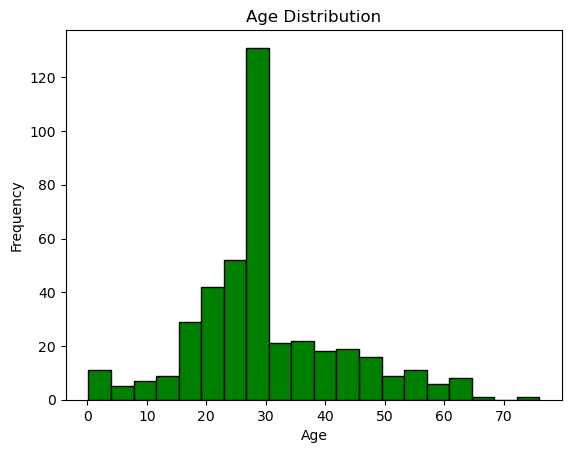

In [13]:
# Create a histogram for a numeric column
plt.hist(x=df['Age'].dropna(), bins=20, color='green', edgecolor='black')  # dropna to avoid NaN issues

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

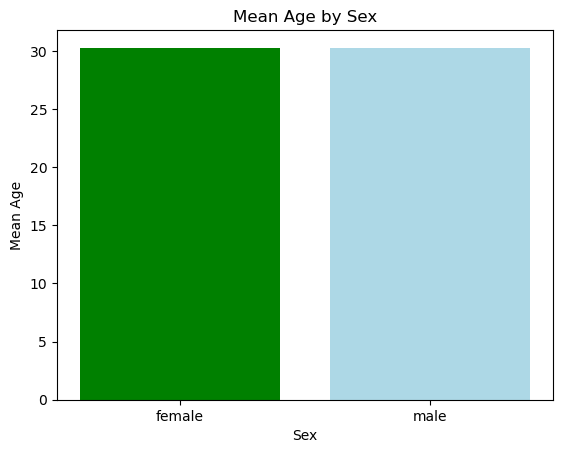

In [16]:
# Create a bar chart of group averages
plt.bar(grouped_df["Sex"], grouped_df["Age"], color=["green", "lightblue"])
plt.title("Mean Age by Sex")
plt.xlabel("Sex")
plt.ylabel("Mean Age")
plt.show()


## Extra Challenge

In [17]:
# Save the cleaned dataset as processed_data.csv
df.to_csv(r"C:\Users\devar\Documents\Dotkonnekt\genai-workshop\week2\data\processed_titanic.csv", index=False)

In [18]:
import os
print(os.path.exists(r"C:\Users\devar\Documents\Dotkonnekt\genai-workshop\week2\data\processed_titanic.csv"))

True
